In [1]:
import numpy as np
import matplotlib.pyplot as plt

# arm_input_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/train_inputdata.npy')
# arm_output_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/train_outputdata.npy')
# arm_input_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/validation_inputdata.npy')
# arm_output_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/smoothed_data/validation_outputdata.npy')

arm_input_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw_data/train_inputdata.npy')
arm_output_train_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw_data/train_outputdata.npy')
arm_input_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw_data/validation_inputdata.npy')
arm_output_validation_data = np.load('/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/raw_data/validation_outputdata.npy')

print(arm_input_train_data.shape)
print(arm_output_train_data.shape)
print(arm_input_validation_data.shape)
print(arm_output_validation_data.shape)

(1155116, 36)
(1155116, 24)
(171867, 36)
(171867, 24)


In [2]:
import pandas as pd
df = pd.read_csv('/home/daniel/Documents/data/daniel_baloo_data_collection/STEPCMDS/parsed_csvs/trial1_60min_100KPa/not_smooth_joint1.csv')

# read in the data from df
t = df['time'].to_numpy()
u = df['u'].to_numpy()
v = df['v'].to_numpy()
udot = df['u_dot'].to_numpy()
vdot = df['v_dot'].to_numpy()
p0 = df['p0'].to_numpy()
p1 = df['p1'].to_numpy()
p2 = df['p2'].to_numpy()
p3 = df['p3'].to_numpy()
# p0_dot = df['p0_dot'].to_numpy()
# p1_dot = df['p1_dot'].to_numpy()
# p2_dot = df['p2_dot'].to_numpy()
# p3_dot = df['p3_dot'].to_numpy()
pc0 = df['p_cmd0'].to_numpy()
pc1 = df['p_cmd1'].to_numpy()
pc2 = df['p_cmd2'].to_numpy()
pc3 = df['p_cmd3'].to_numpy()

In [3]:
# check shapes of all data
print("t shape: ", t.shape)
print("u shape: ", u.shape)
print("v shape: ", v.shape)
print("udot shape: ", udot.shape)
print("vdot shape: ", vdot.shape)
print("p0 shape: ", p0.shape)
print("p1 shape: ", p1.shape)
print("p2 shape: ", p2.shape)
print("p3 shape: ", p3.shape)
print("pc0 shape: ", pc0.shape)
print("pc1 shape: ", pc1.shape)
print("pc2 shape: ", pc2.shape)
print("pc3 shape: ", pc3.shape)

t shape:  (362911,)
u shape:  (362911,)
v shape:  (362911,)
udot shape:  (362911,)
vdot shape:  (362911,)
p0 shape:  (362911,)
p1 shape:  (362911,)
p2 shape:  (362911,)
p3 shape:  (362911,)
pc0 shape:  (362911,)
pc1 shape:  (362911,)
pc2 shape:  (362911,)
pc3 shape:  (362911,)


In [4]:
# Check dt
dt = t[1] - t[0]
print("dt: ", dt)

dt:  0.0099999904632568


In [5]:
# Change the 100 Hz data to 50 Hz data
dt = 0.02
t_old = t
t_new = np.arange(t_old[0], t_old[-1], dt)
u_new = np.interp(t_new, t_old, u)
v_new = np.interp(t_new, t_old, v)
udot_new = np.interp(t_new, t_old, udot)
vdot_new = np.interp(t_new, t_old, vdot)
p0_new = np.interp(t_new, t_old, p0)
p1_new = np.interp(t_new, t_old, p1)
p2_new = np.interp(t_new, t_old, p2)
p3_new = np.interp(t_new, t_old, p3)
pc0_new = np.interp(t_new, t_old, pc0)
pc1_new = np.interp(t_new, t_old, pc1)
pc2_new = np.interp(t_new, t_old, pc2)
pc3_new = np.interp(t_new, t_old, pc3)

In [6]:
# for each dataset, resample using Pchip interpolation with resampled time steps
from scipy.interpolate import PchipInterpolator
import numpy as np


# for each dataset, resample using Pchip interpolation with resampled time steps
from scipy.interpolate import PchipInterpolator

u_resampled_trimmed_pchip = PchipInterpolator(t, u)(t_new)
v_resampled_trimmed_pchip = PchipInterpolator(t, v)(t_new)
u_dot_resampled_trimmed_pchip = PchipInterpolator(t, udot)(t_new)
v_dot_resampled_trimmed_pchip = PchipInterpolator(t, vdot)(t_new)
p0_resampled_trimmed_pchip = PchipInterpolator(t, p0)(t_new)
p1_resampled_trimmed_pchip = PchipInterpolator(t, p1)(t_new)
p2_resampled_trimmed_pchip = PchipInterpolator(t, p2)(t_new)
p3_resampled_trimmed_pchip = PchipInterpolator(t, p3)(t_new)
pc0_resampled_trimmed_pchip = PchipInterpolator(t, pc0)(t_new)
pc1_resampled_trimmed_pchip = PchipInterpolator(t, pc1)(t_new)
pc2_resampled_trimmed_pchip = PchipInterpolator(t, pc2)(t_new)
pc3_resampled_trimmed_pchip = PchipInterpolator(t, pc3)(t_new)

In [7]:
# find delta ps, delta qdot and delta q
delta_p0 = np.zeros((p0.shape[0]-1,))
delta_p1 = np.zeros((p1.shape[0]-1,))
delta_p2 = np.zeros((p2.shape[0]-1,))
delta_p3 = np.zeros((p3.shape[0]-1,))
delta_udot = np.zeros((udot.shape[0]-1,))
delta_vdot = np.zeros((vdot.shape[0]-1,))
delta_u = np.zeros((u.shape[0]-1,))
delta_v = np.zeros((v.shape[0]-1,))

for i in range(delta_p0.shape[0]-1):
    delta_p0[i] = p0[i+1] - p0[i]
    delta_p1[i] = p1[i+1] - p1[i]
    delta_p2[i] = p2[i+1] - p2[i]
    delta_p3[i] = p3[i+1] - p3[i]
    delta_udot[i] = udot[i+1] - udot[i]
    delta_vdot[i] = vdot[i+1] - vdot[i]
    delta_u[i] = u[i+1] - u[i]
    delta_v[i] = v[i+1] - v[i]    

In [8]:

print("delta_p0 shape: ", delta_p0.shape)
print("delta_p1 shape: ", delta_p1.shape)
print("delta_p2 shape: ", delta_p2.shape)
print("delta_p3 shape: ", delta_p3.shape)
print("delta_udot shape: ", delta_udot.shape)
print("delta_vdot shape: ", delta_vdot.shape)
print("delta_u shape: ", delta_u.shape)
print("delta_v shape: ", delta_v.shape)

delta_p0 shape:  (362910,)
delta_p1 shape:  (362910,)
delta_p2 shape:  (362910,)
delta_p3 shape:  (362910,)
delta_udot shape:  (362910,)
delta_vdot shape:  (362910,)
delta_u shape:  (362910,)
delta_v shape:  (362910,)


In [9]:
p0_final = p0[:-1]
p1_final = p1[:-1]
p2_final = p2[:-1]
p3_final = p3[:-1]
udot_final = udot[:-1]
vdot_final = vdot[:-1]
u_final = u[:-1]
v_final = v[:-1]
pc0_final = pc0[:-1]
pc1_final = pc1[:-1]
pc2_final = pc2[:-1]
pc3_final = pc3[:-1]

print("p0_final shape: ", p0_final.shape)
print("p1_final shape: ", p1_final.shape)
print("p2_final shape: ", p2_final.shape)
print("p3_final shape: ", p3_final.shape)
print("udot_final shape: ", udot_final.shape)
print("vdot_final shape: ", vdot_final.shape)
print("u_final shape: ", u_final.shape)
print("v_final shape: ", v_final.shape)
print("pc0_final shape: ", pc0_final.shape)
print("pc1_final shape: ", pc1_final.shape)
print("pc2_final shape: ", pc2_final.shape)
print("pc3_final shape: ", pc3_final.shape)

p0_final shape:  (362910,)
p1_final shape:  (362910,)
p2_final shape:  (362910,)
p3_final shape:  (362910,)
udot_final shape:  (362910,)
vdot_final shape:  (362910,)
u_final shape:  (362910,)
v_final shape:  (362910,)
pc0_final shape:  (362910,)
pc1_final shape:  (362910,)
pc2_final shape:  (362910,)
pc3_final shape:  (362910,)


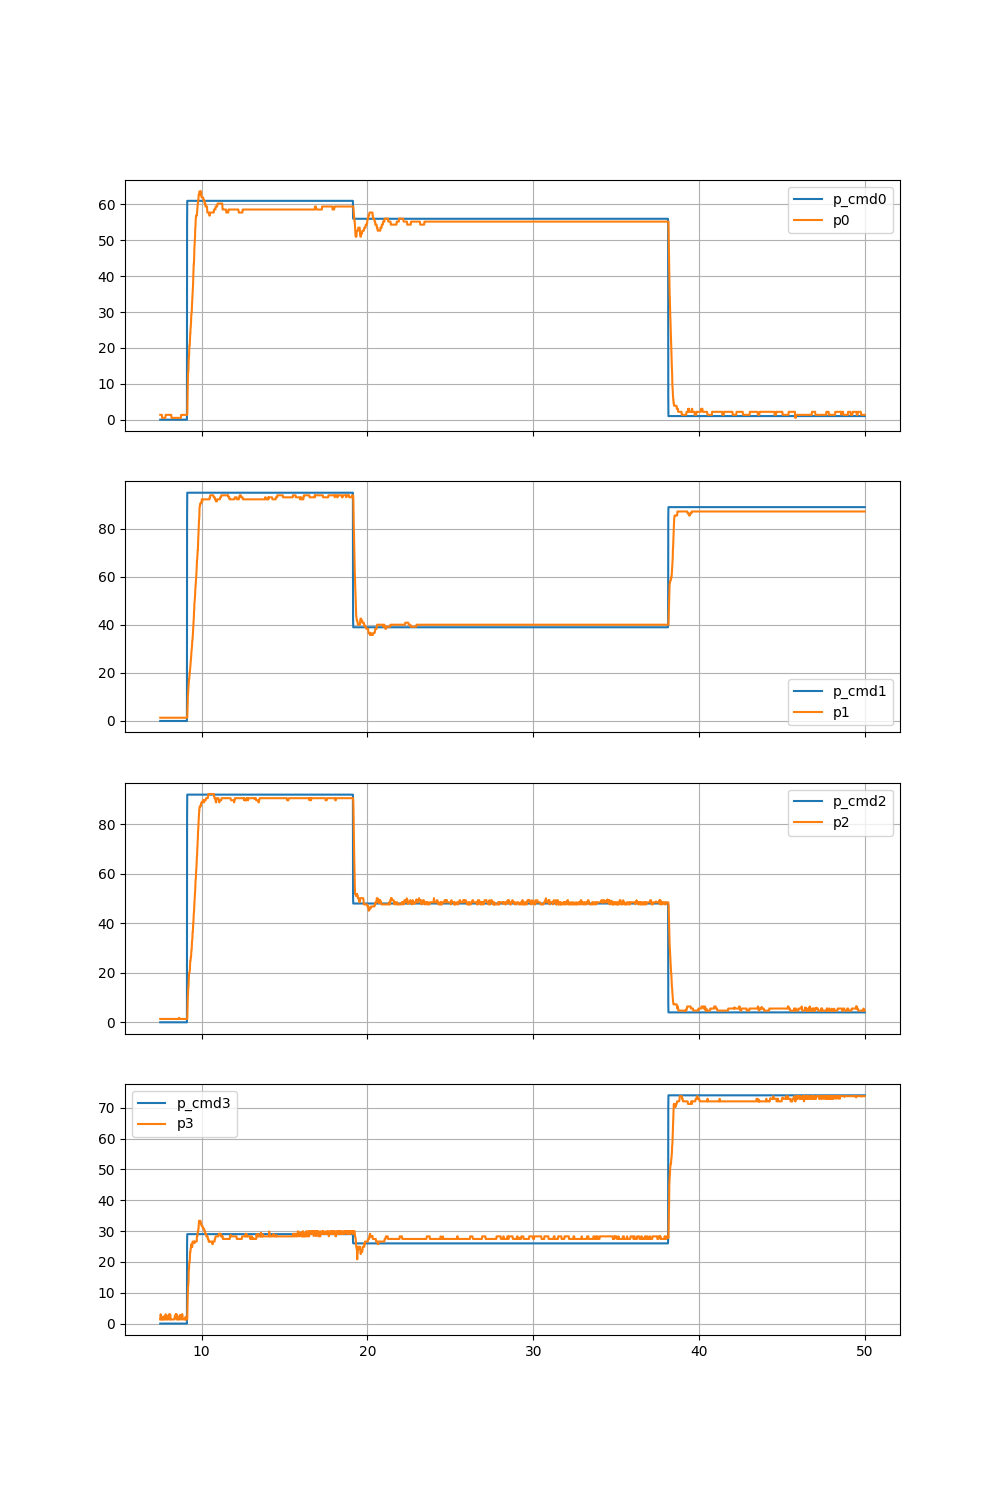

In [10]:
%matplotlib widget

start = 750
end = 5000

fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

axs[0].plot(t[start:end], pc0[start:end], label='p_cmd0')
axs[0].plot(t[start:end], p0[start:end], label='p0')
# axs[0].plot(t[start:end], p0_new[start:end], label='p0_new')
# axs[0].plot(t_new[start:end], p0_resampled_trimmed_pchip[start:end], label='p0_resampled_trimmed_pchip')

axs[1].plot(t[start:end], pc1[start:end], label='p_cmd1')
axs[1].plot(t[start:end], p1[start:end], label='p1')
# axs[1].plot(t[start:end], p1_new[start:end], label='p1_new')

axs[2].plot(t[start:end], pc2[start:end], label='p_cmd2')
axs[2].plot(t[start:end], p2[start:end], label='p2')
# axs[2].plot(t[start:end], p2_new[start:end], label='p2_new')

axs[3].plot(t[start:end], pc3[start:end], label='p_cmd3')
axs[3].plot(t[start:end], p3[start:end], label='p3')
# axs[3].plot(t[start:end], p3_new[start:end], label='p3_new')

for ax in axs:
    ax.legend()
    ax.grid(True)